In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset
file_path = r'C:\Users\Chethana\Desktop\D_S\googleplaystore.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Displaying Last 3 Rows
df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# Shape of the Dataset
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# Overall Statistics
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
# Apps with "Astrology" in Title
astrology_apps = df[df['App'].str.contains('Astrology', case=False, na=False)]
astrology_apps_count = len(astrology_apps)

In [9]:
# Average Rating
average_rating = df['Rating'].mean()
print(average_rating)

4.193338315362448


In [10]:
# Unique Categories
unique_categories = df['Category'].nunique()
print(unique_categories)

34


In [11]:
# Category with Highest Average Rating
highest_avg_rating_category = df.groupby('Category')['Rating'].mean().idxmax()
highest_avg_rating = df.groupby('Category')['Rating'].mean().max()
print(highest_avg_rating_category)
print(highest_avg_rating)

1.9
19.0


In [12]:
# Total Apps with 5-Star Rating
five_star_apps = len(df[df['Rating'] == 5])
print(five_star_apps)

274


In [13]:
# Convert Reviews to Numeric Type
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
average_reviews = df['Reviews'].mean()
print(average_reviews)

444152.89603321033


In [14]:
# Total Number of Free and Paid Apps
free_paid_counts = df['Type'].value_counts()
print(free_paid_counts)

Free    10039
Paid      800
0           1
Name: Type, dtype: int64


In [15]:
# Total Number of Free and Paid Apps
free_paid_counts = df['Type'].value_counts()
print(free_paid_counts)

Free    10039
Paid      800
0           1
Name: Type, dtype: int64


In [16]:
# App with Maximum Reviews
max_reviews_app = df.loc[df['Reviews'].idxmax()]['App']
max_reviews_count = df['Reviews'].max()
print(max_reviews_app)
print(max_reviews_count)

Facebook
78158306.0


In [17]:
# Top 5 Apps with Highest Reviews
top_5_reviews = df.nlargest(5, 'Reviews')[['App', 'Reviews']]
print(top_5_reviews)

                     App     Reviews
2544            Facebook  78158306.0
3943            Facebook  78128208.0
336   WhatsApp Messenger  69119316.0
381   WhatsApp Messenger  69119316.0
3904  WhatsApp Messenger  69109672.0


In [18]:
# Average Rating for Free and Paid Apps
free_paid_avg_rating = df.groupby('Type')['Rating'].mean()
print(free_paid_avg_rating)

Type
0       19.000000
Free     4.186203
Paid     4.266615
Name: Rating, dtype: float64


In [19]:
# Remove non-numeric values in 'Installs' column (e.g., 'Free')
df = df[df['Installs'] != 'Free']

# Convert 'Installs' to numeric by removing commas and '+' signs
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(float)

# Now, get the top 5 apps with maximum installs
top_5_installs = df.nlargest(5, 'Installs')[['App', 'Installs']]
top_5_installs

,App,Installs
152,Google Play Books,1.000000e+09
335,Messenger – Text and Video Chat for Free,1.000000e+09
336,WhatsApp Messenger,1.000000e+09
338,Google Chrome: Fast & Secure,1.000000e+09
340,Gmail,1.000000e+09


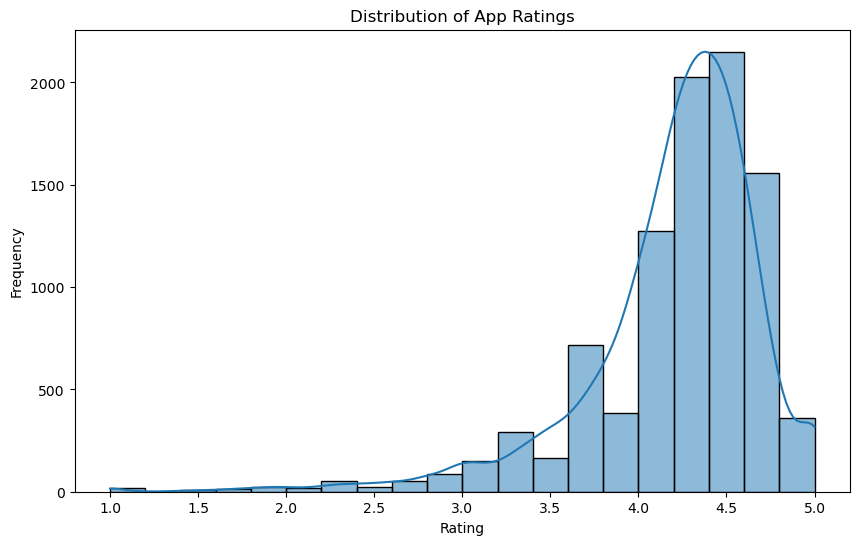

In [20]:
# Distribution of Ratings
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

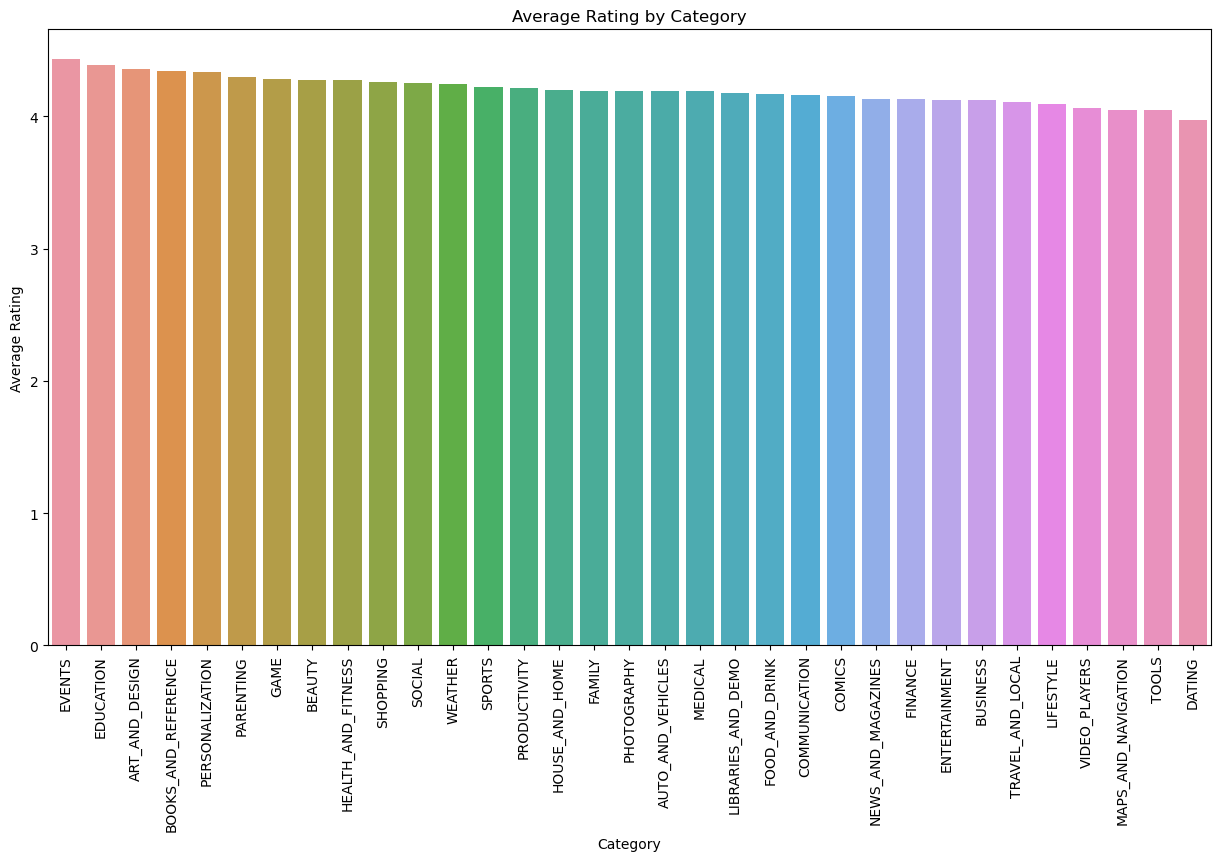

In [21]:
# Average Rating by Category
plt.figure(figsize=(15,8))
category_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=category_ratings.index, y=category_ratings.values)
plt.xticks(rotation=90)
plt.title("Average Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()

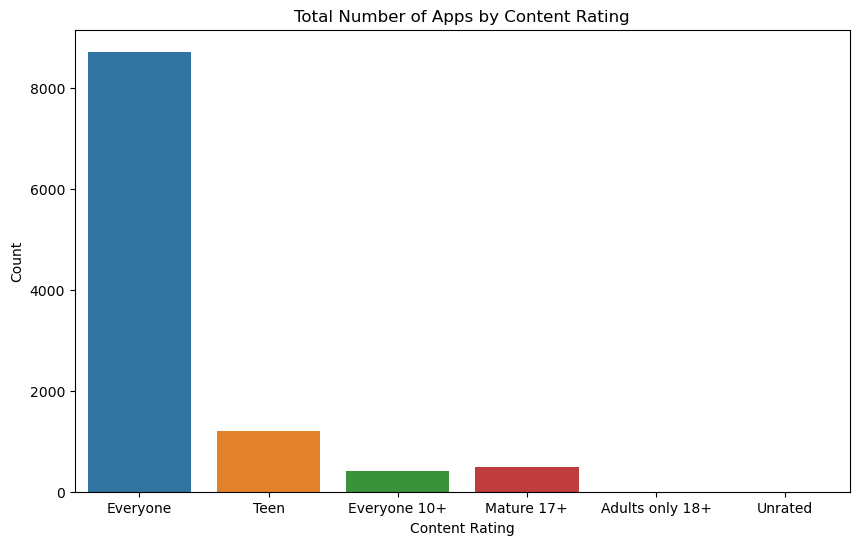

In [22]:
# Total Number of Apps by Content Rating
plt.figure(figsize=(10,6))
sns.countplot(x='Content Rating', data=df)
plt.title("Total Number of Apps by Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Count")
plt.show()